In [15]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
df_dummies = pd.get_dummies(df)
del df_dummies["duration"]
del df_dummies["y_no"]
print df_dummies

       age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56         1    999         0           1.1          93.994   
1       57         1    999         0           1.1          93.994   
2       37         1    999         0           1.1          93.994   
3       40         1    999         0           1.1          93.994   
4       56         1    999         0           1.1          93.994   
5       45         1    999         0           1.1          93.994   
6       59         1    999         0           1.1          93.994   
7       41         1    999         0           1.1          93.994   
8       24         1    999         0           1.1          93.994   
9       25         1    999         0           1.1          93.994   
10      41         1    999         0           1.1          93.994   
11      25         1    999         0           1.1          93.994   
12      29         1    999         0           1.1          93.994   
13    

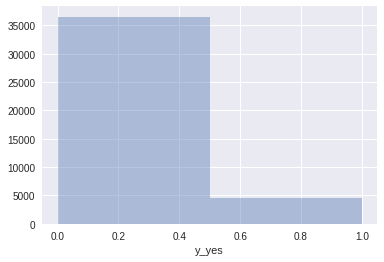

In [19]:
sns.distplot(df_dummies["y_yes"], bins=2, kde=False, rug=False );

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
y = df_dummies['y_yes']
del df_dummies['y_yes']
X = np.asarray(df_dummies)
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(df_dummies, y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [21]:
for train_index, test_index in skf.split(X, y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = ExtraTreesClassifier(n_estimators = 100,max_depth = 4)
        
        dummy_clf = DummyClassifier()
        scores = cross_val_score(clf, X_train, y_train, cv=10,scoring = make_scorer(acc))
        dummy_clf.fit(X_train,y_train)
        print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
        print("Dummy ACC: %0.2f")% (acc(y_test,dummy_clf.predict(X_test)))


ACC: 0.85 (+/- 0.12)
Dummy ACC: 0.80
ACC: 0.86 (+/- 0.09)
Dummy ACC: 0.80
ACC: 0.84 (+/- 0.13)
Dummy ACC: 0.80
ACC: 0.85 (+/- 0.10)
Dummy ACC: 0.81
ACC: 0.85 (+/- 0.13)
Dummy ACC: 0.79
ACC: 0.85 (+/- 0.12)
Dummy ACC: 0.80
ACC: 0.84 (+/- 0.13)
Dummy ACC: 0.80
ACC: 0.83 (+/- 0.17)
Dummy ACC: 0.80
ACC: 0.79 (+/- 0.20)
Dummy ACC: 0.80
ACC: 0.87 (+/- 0.14)
Dummy ACC: 0.81


In [22]:
clf = ExtraTreesClassifier(n_estimators = 100,max_depth = 4)
X = df_dummies.values
dummy_clf = DummyClassifier()
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))
dummy_clf.fit(X,y)
print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f")% (acc(y,dummy_clf.predict(X)))

ACC: 0.81 (+/- 0.16)
Dummy ACC: 0.80


0.899436729144
[61  7  2  4  8  6 60 49  5 59 50 42 52 53 43  3 10 33 34 48 47 44 14 17 51
  0 55 27 46 45  1 23 31 22 54 56 20 16 32 57 15 28 36  9 30 58 25 21 37 18
 39 40 41 24 11 26 19 13 12 38 29 35]
Feature ranking:
1. poutcome_success (0.197104)
2. euribor3m (0.178996)
3. pdays (0.132275)
4. emp.var.rate (0.098678)
5. nr.employed (0.070178)
6. cons.conf.idx (0.047031)
7. poutcome_nonexistent (0.045687)
8. month_mar (0.027687)
9. cons.price.idx (0.026766)
10. poutcome_failure (0.024336)
11. month_may (0.022041)
12. contact_cellular (0.021599)
13. month_oct (0.019606)
14. month_sep (0.012893)
15. contact_telephone (0.010099)
16. previous (0.008927)
17. job_blue-collar (0.007530)
18. default_no (0.006064)
19. default_unknown (0.004885)
20. month_jun (0.004368)
21. month_jul (0.004209)
22. month_apr (0.003908)
23. job_retired (0.003319)
24. job_student (0.003282)
25. month_nov (0.002930)
26. age (0.002593)
27. day_of_week_mon (0.002111)
28. education_basic.9y (0.002023)
29. month_de

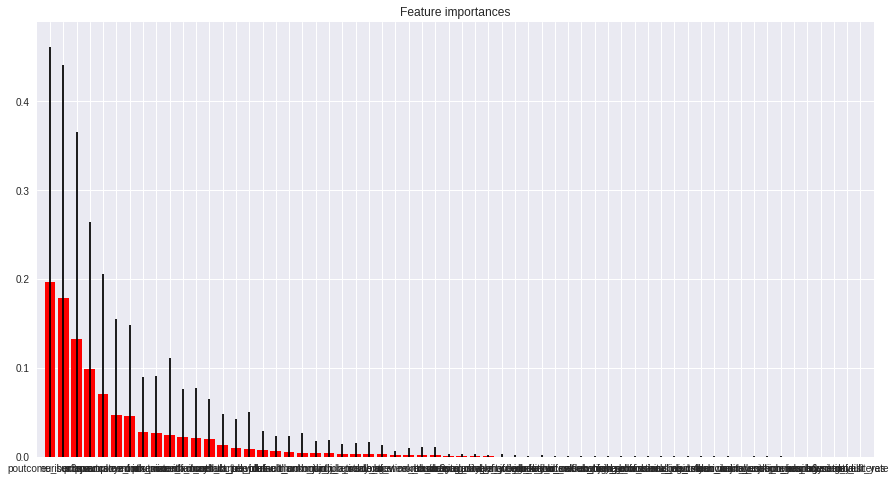

In [25]:
clf.fit(X,y)
print acc(y,clf.predict(X))

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = df_dummies.columns
print indices
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')

Normalized confusion matrix


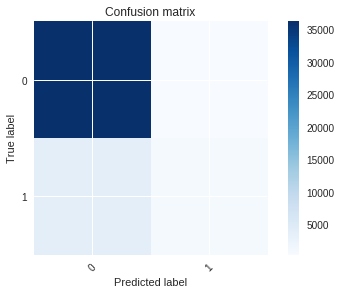

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion.png",bbox_inches='tight')
plt.savefig("confusion.pdf",bbox_inches='tight')
